# Hola Natalia!

Mi nombre es David Bautista, soy code reviewer de TripleTen y voy a revisar el proyecto que acabas de desarrollar.

Cuando vea un error la primera vez, lo señalaré. Deberás encontrarlo y arreglarlo. La intención es que te prepares para un espacio real de trabajo. En un trabajo, el líder de tu equipo hará lo mismo. Si no puedes solucionar el error, te daré más información en la próxima ocasión.

Encontrarás mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres.**

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Puedes responderme de esta forma: 

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div

¡Empecemos!

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
# Comentario General
    
~~Hola, Natalia, te felicito por el desarrollo del proyecto hasta el momento. Ahora bien, he dejado diferentes comentarios para que puedas tenerlos en cuenta para la siguiente entrega. Fíjate que deje un comentario con el subtítulo **Comentario Importante** el cual es importante que tengas en cuenta para que continuemos con la revisión del proyecto.~~
</div>


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
# Comentario General #2
    
Hola, Natalia, te felicito por la culminación del proyecto. Muy buen trabajo.
</div>

# <center>Implementación de Pruebas A/B para el Análisis de Estrategias de Incremento de Ingresos</center>


### Introducción

El siguiente proyecto tiene como objetivo analizar estrategias para aumentar la atracción, conversión e ingresos de usuarios de una tienda online. Para ello se evaluan un conjunto de hipótesis a la luz de los indicadores RICE y ICE con la pretensión de determinar las estrategias más viables. 
Posteriormente se aplica una prueba A/B en la que se busca estudiar la conversión  

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Perfecto, buen trabajo con la sección de introducción y descripción del proyecto. Por otro lado, buen detalle el de centrar el título, me gusta mucho como queda visualmente. 
</div>

### Importación de librerías y carga de datasets

In [47]:
#Se importan las librerías
import pandas as pd
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import levene
import datetime as dt
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo importando las librerías necesarias para el desarrollo del proyecto.
</div>

In [48]:
# Se cargan los datasets 

hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep = ';')
orders= pd.read_csv('/datasets/orders_us.csv')
visits = pd.read_csv('/datasets/visits_us.csv')

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Excelente, buen trabajo con la carga de los datasets. </div>

In [49]:
#Se covnierten las fechas a tipo datetime
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')
visits['date'] = pd.to_datetime(visits['date'], format='%Y-%m-%d')

In [50]:
pd.set_option('display.max_colwidth', None)
display(hypotheses)

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


### Priorizar Hipótesis

In [51]:
hypotheses['ICE'] =(hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']
hypotheses['RICE'] =(hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']
hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort,ICE,RICE
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.333333,40.0
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.000000,4.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.000000,56.0
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125000,9.0
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.000000,3.0
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.333333,4.0
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.000000,40.0
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.200000,112.0
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200000,16.2


In [52]:
print(hypotheses[['Hypothesis', 'RICE']].sort_values(by= 'RICE', ascending =False))

                                                                                                               Hypothesis  \
7                                Add a subscription form to all the main pages. This will help you compile a mailing list   
2          Add product recommendation blocks to the store's site. This will increase conversion and average purchase size   
0                                             Add two new channels for attracting traffic. This will bring 30% more users   
6                                 Show banners with current offers and sales on the main page. This will boost conversion   
8                                                        Launch a promotion that gives users discounts on their birthdays   
3  Change the category structure. This will increase conversion since users will find the products they want more quickly   
1                                                       Launch your own delivery service. This will shorten delivery time   


In [53]:
print(hypotheses[['Hypothesis', 'ICE']].sort_values(by= 'ICE', ascending =False))

                                                                                                               Hypothesis  \
8                                                        Launch a promotion that gives users discounts on their birthdays   
0                                             Add two new channels for attracting traffic. This will bring 30% more users   
7                                Add a subscription form to all the main pages. This will help you compile a mailing list   
6                                 Show banners with current offers and sales on the main page. This will boost conversion   
2          Add product recommendation blocks to the store's site. This will increase conversion and average purchase size   
1                                                       Launch your own delivery service. This will shorten delivery time   
5                                                     Add a customer review page. This will increase the number of orders   


**Comentarios:**

RICE y ICE en este caso tienen los mismos valores de base, se considera el imapcto y la confianza, y estas se dividen entre el esfuerzo que implica. Sin embargo RICE toma también en consideración el alcance. Por ello la calificación de los dos paramaretros para cada hipotesis es diferente. 

En el caso de RICE agregar un formato de suscripción a todas las páginas principales, para compilar una lista de correos electronicos es la hipótesis que se debe priorizar, mientras que en el caso de ICE esta misma hipótesis ocupa el tercer lugar y en primer lugar está lanzar una campaña que ofrezca a los usuarios descuentos en sus cumpleaños. 

Pero si lo que se busca es considerar tanto RICE como ICE este podría ser un buen intermedio, considerando las 4 principales hipótesis de ambos: 

1. agregar un formato de suscripción a todas las páginas principales, para compilar una lista de correos electronicos
2. lanzar una campaña que ofrezca a los usuarios descuentos en sus cumpleaños
3. agregar dos canales para atraer tráico de usuarios, para obtener un incremento del 30%
4. mostrar anuncios con ofertas y ventas actuales en la página principal, para aumentar la conversión

Se aclara que como RICE considera también el factor alcance, este podría ser un parámetro un poco más completo. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo. Aplicas los frameworks RISE e ICE de manera correcta. Adicional a lo anterior, realizas una comparación de los resultados de muy buena manear y genera conclusiones coherentes e interesantes. </div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
**Comentario Importante** 
    
~~Hola, Natalia. He revisado toda to sección de Análisis de test A/B y realmente luce bien e interesante, ahora bien, me he fijado que antes de desarrollarla no has tenido en cuenta un aspecto importante para que las conclusiones que obtengamos sean las correctas, debes previos al desarrollo de los análisis identificar y eliminar los usuarios que están presentes en los dos grupos.~~ </div>


### Análisis del test A/B

In [54]:
#se abre el dataframe visits
visits

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [55]:
#Se abre el dataframe orders
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


In [56]:
#Se identifican los usuarios que están en dos grupos a la vez
visitor_group_counts = orders.groupby('visitorId')['group'].nunique()
visitors_in_multiple_groups = visitor_group_counts[visitor_group_counts > 1].index
df_visitors_in_multiple_groups = orders[orders['visitorId'].isin(visitors_in_multiple_groups)]

#Se procede a eliminar estos usuarios, ya que sesgarían la prueba
orders_cleaned = orders[~orders['visitorId'].isin(visitors_in_multiple_groups)]

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Perfecto, buen trabajo eliminando los usuarios repetidos en los dos grupos. </div>

#### Ingreso acumulado por grupo

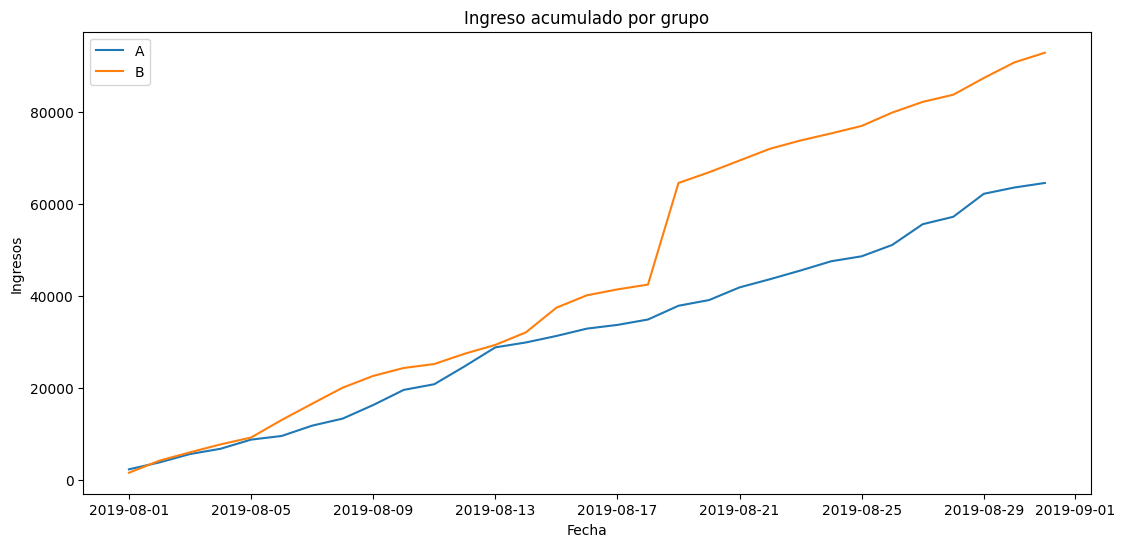

In [57]:
#Se crea una variable con valores unicos de date y group
datesGroups = orders[['date','group']].drop_duplicates()

#Se crea la variable ordersAggregated para almacenar fecha, grupo, número de pedidos y ingresos totales
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
                                     .agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : 
                                           pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

#Se crea la variable visitorsAggregated para almacenar fecha, grupo y el total de visitas
visitorsAggregated = datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])]
                                       .agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), 
                                       axis=1).sort_values(by=['date','group'])

#Se define la variable cumulativeData para unificar los dataframes visitorsAggregated y ordersAggregated
cumulativeData = pd.merge(ordersAggregated, visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

#Se declaran las variables cumulativeRevenueA y cumulativeRevenueB para almacenar la información de cada grupo
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

#Se gráfica el ingreso acumulado por grupo
plt.figure(figsize=(13, 6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Ingreso acumulado por grupo')
plt.xlabel('Fecha')
plt.ylabel('Ingresos')
plt.legend();

**Comentarios:**

Podría decirse que al iniciio de la prueba ambos grupos tenían unos ingresos más o menos similares, pero esto fue cambiando en el transcurso de los días. Así, podría afirmarse que los ingresos acumulados del grupo B parecen ser considerablemente más altos que los del grupo A. Sin embargo, es necesario revisar la posibilidad de valores extremos en ciertos días de aplicación de la prueba, ya que como se observa, aunque hay un crecimiento uniforme en casi toda la prueba, hay algunos picos para ambos grupos, lo cual podría indicarnos que en días especificos o las ventas aumentaron o hay algunos pedidos especialmente costosos, pero no habituales. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Perfecto, buen trabajo con el despliegue del gráfico de los ingresos acumulados por grupo.  </div>

#### Tamaño de pedido promedio

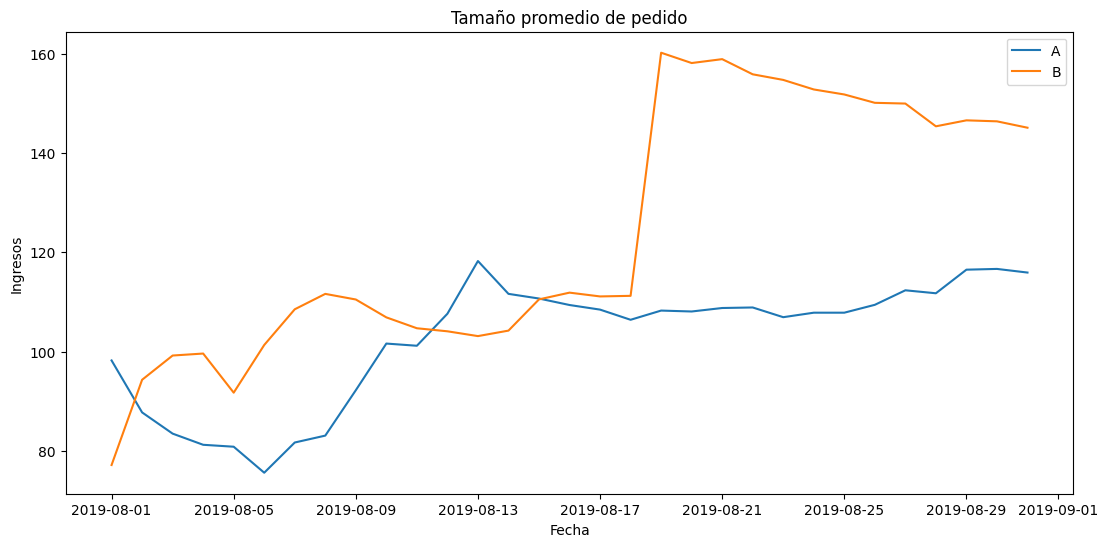

In [58]:
#Se gráfica el tamaño promedio de compra
plt.figure(figsize=(13, 6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Tamaño promedio de pedido')
plt.xlabel('Fecha')
plt.ylabel('Ingresos')
plt.legend();

**Comentarios:**

En este caso, la prueba acumulada es bastante fluctuante, no se evidencia una estabilidad o patron claro, esto puede deberse a la presencia de valores extremos. Es importante destacar que los valores extremos en el tamaño de productos podrían también estar afectando la métrica de ingreso acumulado, pero esto será evaluado más adelante. Sin embargo, en términos generales, con la información obtenida hasta el momento, podría decirse que el grupo B ha hecho compras más grandes que el grupo A, lo cual concuerda con el comportamiento de la métrica anterior.  

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Perfecto, buen trabajo con el despliegue del gráfico del tamaño de pedido pormedio acumulado por grupo.  </div>

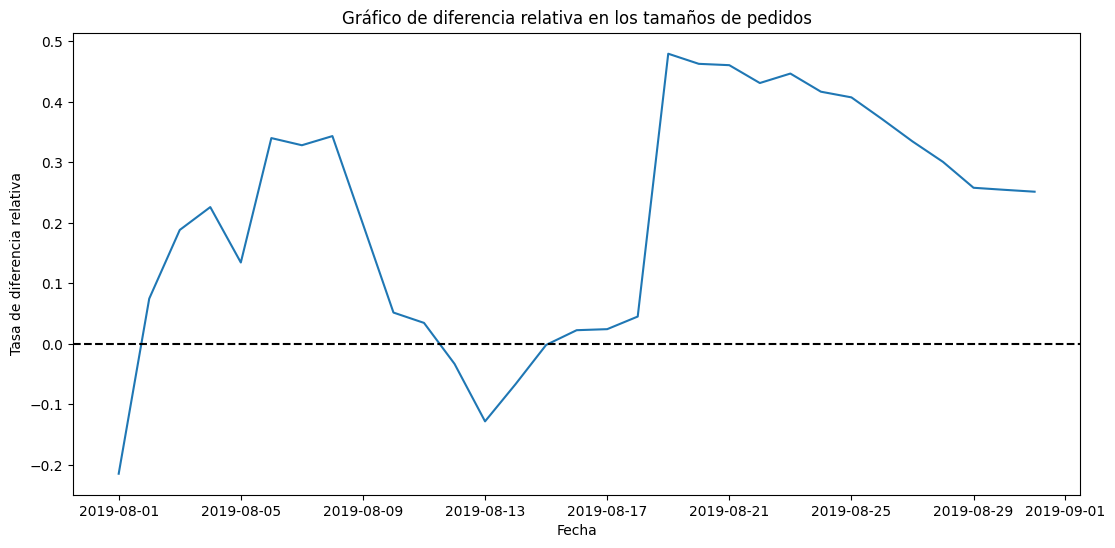

In [59]:
# Se crea el DataFrame mergedCumulativeRevenue para unir los datos de cumulativeRevenueA y cumulativeRevenueB
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# Se gráfica la diferencia relativa para los tamaños de compra promedio
plt.figure(figsize=(13, 6))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Gráfico de diferencia relativa en los tamaños de pedidos')
plt.xlabel('Fecha')
plt.ylabel('Tasa de diferencia relativa');

**Comentarios:**

En este caso también se observan fluctuaciones, se observan picos, no es un gráfico realmente estable, lo que podría significar presencia de valores extremos, sin embargo, también seguiría indicando un mejor comportamiento en las metricas para el grupo B que para el grupo A. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Perfecto, buen trabajo con el desarrollo del grafico de a diferencia relativa en el tamaño de los grupos.   </div>

#### Tasa de Conversión Acumulada

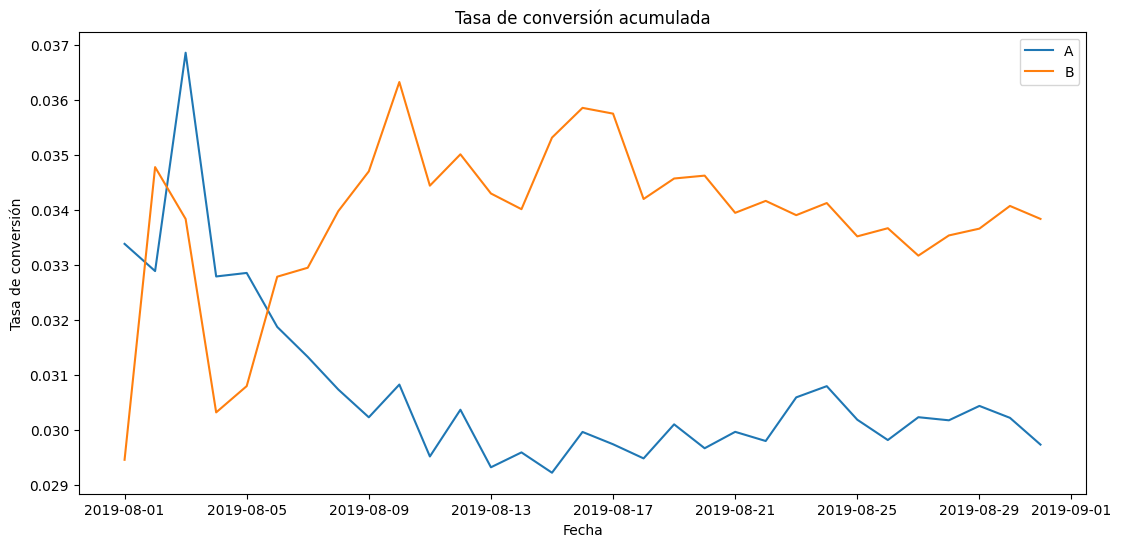

In [60]:
#Se crea la columna conversion en el dataframe cumulativeData
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

#Se crean las variables cumulativeDataA y cumulativeDataB para almacenar solo la información del grupo A y B
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

#Se gráfica la tasa de conversión acumulada
plt.figure(figsize=(13, 6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('Tasa de conversión acumulada')
plt.xlabel('Fecha')
plt.ylabel('Tasa de conversión')
plt.legend();

**Comentarios:**

Al principio de la prueba se ve mayor insestabilidad en los datos, lo cual podría considerarse normal por el tamaño de la muestra, pero posteriormente la gráfica se va estabilizando. Al principio pareciera ser que el grupo A tiene una mayor tasa de conversión, sin embargo, con el transcurrir de la prueba, la gráfica cae y sigue un comportamiento decreciente. Lo contrario pasa con el grupo B, que inicia con un comportamiento negativo, pero luego la grafica crece y mantiene ese comportamiento. Aunque hay picos, la metrica del grupo B sigue siendo considerablemente mejor que la del grupo A. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Perfecto, buen trabajo con el desarrollo del grafico de la tasa de conversión acumulada.   </div>

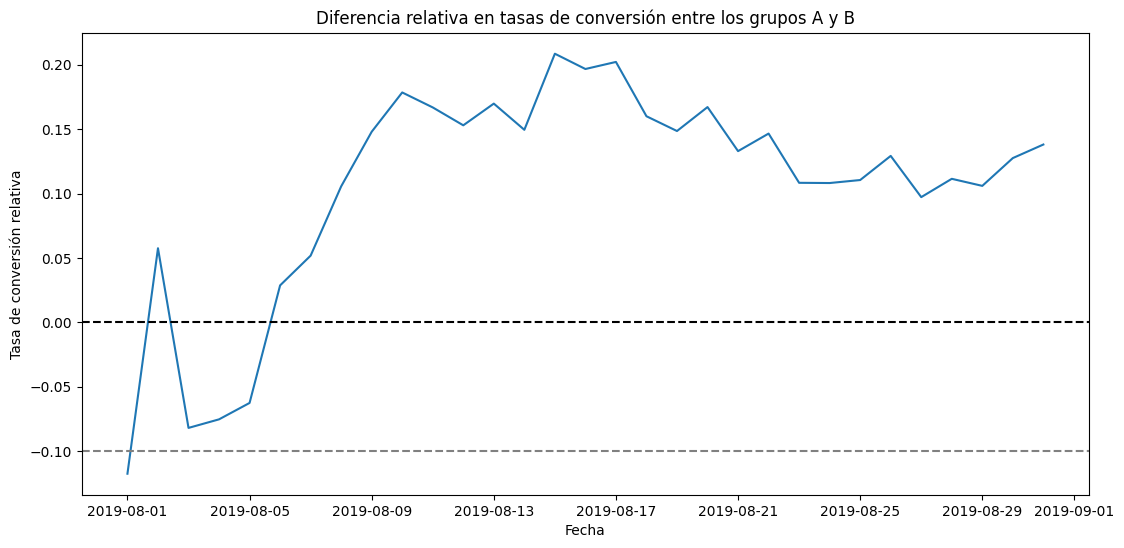

In [61]:
# Se crea el DataFrame mergedCumulativeConversions para unir los datos de cumulativeRevenueA y cumulativeRevenueB
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# Se gráfica la Tasa de conversión relativa
plt.figure(figsize=(13, 6))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.title('Diferencia relativa en tasas de conversión entre los grupos A y B')
plt.xlabel('Fecha')
plt.ylabel('Tasa de conversión relativa');

**Comentarios:**

De acuerdo a la gráfica de diferencia relativa, solo al principio de la prueba se observa un mejor comportamiento para el grupo A, pero de manera temprana se identiifica un claro crecimiento en la tasa de conversión para el grupo B.

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Perfecto, buen trabajo con el desarrollo del grafico de la diferencia relativa en las tasas de conversión.  </div>

### Detección de valores atípicos

#### Número de pedidos por usuario

In [62]:
#Se calcula el número de pedidos por usuario
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

ordersByUsers.columns = ['visitorId', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,visitorId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


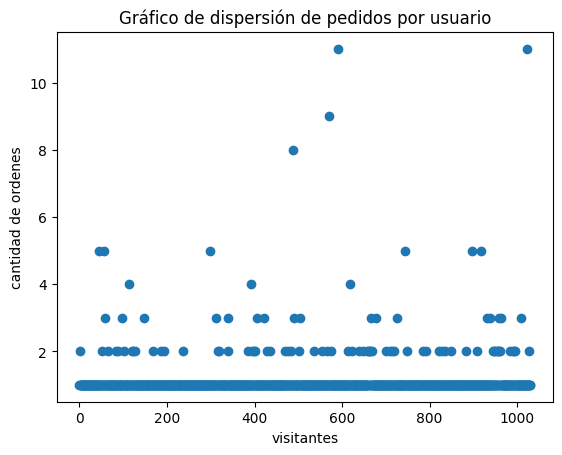

In [63]:
#Se hace gráfico de dispersión para pedidos por usuario
x_values = pd.Series(range(0, len(ordersByUsers['visitorId'])))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Gráfico de dispersión de pedidos por usuario')
plt.xlabel('visitantes')
plt.ylabel('cantidad de ordenes')
plt.show();

In [64]:
#Se calculan percentiles de número de pedidos por usuario
print(np.percentile(ordersByUsers['orders'], [90, 95, 99]))

[1. 2. 4.]


**Comentarios:**

Respecto al comportamiento de los datos sobre el número de pedidos, podría decirse que en el 90% de los casos se hizo un pedido por usuario, siendo este el comportamiento más habitual, solo el 5% de los usuarios hicieron entre 2 y 4 pedidos y especificamente el 1% hizo 4 pedidos. 
Esto nos indicaría que los clientes que hicieron más de 1 pedido realmente son excepcionales, son valores extremos, como puede corroborarse en el gráfico de dispersión. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Buen trabajo con el grafico de disperisón del numero de pedidos por usuario y asi mismo con el calculo de los percentiles. </div>

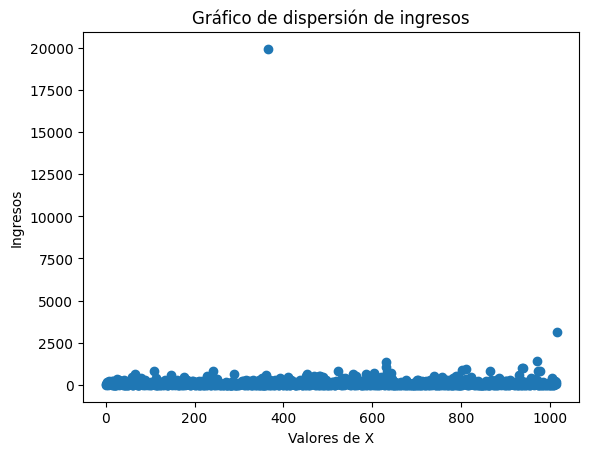

In [65]:
#Se hace un gráfico de dispersión para los ingresos por pedidos
x_values = pd.Series(range(0, len(orders_cleaned['revenue'])))
plt.scatter(x_values, orders_cleaned['revenue'])
plt.title('Gráfico de dispersión de ingresos')
plt.xlabel('Valores de X')
plt.ylabel('Ingresos')
plt.show();

In [66]:
print(np.percentile(orders_cleaned['revenue'], [90, 95, 99]))

[280.8   414.275 830.3  ]


**Comentarios:**

En este caso aunque existen algunos valores atipicos, hay mayor uniformidad que en el caso de la metrica anterior. Aquí el 90% de las ordenes generaron ingresos por debajo de 280.8 dolares, solo el 5% de los usuarios hizo pedidos de por lo menos 414.27 dolares y solo el 1% hizo compras sobre 830.3 dolares. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Buen trabajo con el grafico de disperisón del precio de los pedidos y asi mismo con el calculo de los percentiles. </div>

In [74]:
#Se calcula la significancia estadistica de la diferencia en la conversión entre grupo A y B con datos brutos

ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')

[ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')]

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))


0.01679
0.138


**Comentarios:**

Para calcular la significancia estadistica en la conversión de ambos grupos se aplicó la prueba Mann-Whitney U. Los resultados indican una diferencia significativa entre el grupo A y B, y una probabilidad menor al 1.6% de que esta diferencia se deba al azar. El resultado también indica que el grupo B tiene un rendimiento 13.8% mejor que el del grupo A, lo cual concuerda con todo lo observado a lo largo de la prueba. 

In [68]:
#Se calcula la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos con datos brutos
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.692
0.252


**Comentarios:**

En este caso, los resultados sugerirían que no hay diferencia entre los grupos y que el grupo B sigue teniendo un comportamiento 25% mejor que el del grupo A. 

In [76]:
#Se identifican los usuarios anómalos por numero de pedido y por costo de pedido
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 600]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape)

1099    148427295
18      199603092
23      237748145
37      249864742
684     358944393
Name: visitorId, dtype: int64
(47,)


In [81]:
#Se crea un filtro que excluye los usuarios anómalos
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

#Se calcula la significancia estadistica de la conversión de los usuarios con datos filtrados
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.007
0.186


**Comentarios:**

Anteriormente se había calculado la significancia estadistica con todo el conjunto de datos, incluyendo los valores extremos o anomalos. Aquí se aplicó un filtro que excluía esos casos, y se obtuvo como resultado que en el caso de la conversión de los usuarios sí hay una diferencia significativa entre los grupos, y el grupo B tiene un comportamiento 18,6% mejor que el grupo A, lo cual concuerda con los resultados hallados anteriormente. 

In [80]:
#Se calcula la significancia estadistica en el tamaño promedio de los pedidos con datos filtrados
print('{0:.3f}'.format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print('{0:.3f}'.format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.918
0.056


**Comentarios:**

Nuevamente se calcula la significancia estadistica en el tamaño promedio de los pedidos pero en esta ocasión excluyendo los valores extremos, se observa que no hay una diferencia entre los grupos, y que el grupo B tiene un comportamiento 56% mejor que el grupo A. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Buen trabajo con el desarrollo de las secciones de significancia estadística. </div>

### Conclusiones

* De acuerdo a los indicadores RICE y ICE, estas son las hipótesis que se consideran más relevantes:
1. agregar un formato de suscripción a todas las páginas principales, para compilar una lista de correos electronicos
2. lanzar una campaña que ofrezca a los usuarios descuentos en sus cumpleaños
3. agregar dos canales para atraer tráico de usuarios, para obtener un incremento del 30%
4. mostrar anuncios con ofertas y ventas actuales en la página principal, para aumentar la conversión

* A lo largo de la prueba se observa un comportamiento favorable del grupo B, en comparación con el grupo A, aunque se observaron valores extremos, se calculó la significancia estadistica de los datos brutos y filtrados para obtener conclusiones más certeras.  

* En el caso de la métrica de conversión, la significancia estadistica de los datos brutos indican que existe una diferencia importante entre el grupo A y B y que B tiene un rendimiento 13.8% mejor que el del grupo A. Ahora bien, luego de filtrar los datos, los resultados de la significancia estadistica reconfirman lo anterior, pero indican que el grupo B tiene un comportamiento 18,6% mejor que el del grupo A. 

* En cuanto al tamaño promedio de los pedidos, los datos indicarian que tanto con los datos filtrados como brutos, no existe una diferencia entre los grupos, pero en ambos casos el grupo B tiene un comportamiento significativamente mejor que el grupo A: 25% en el caso de los datos brutos y 56% en el caso de los datos filtrados. Habiendo tratado esto, también se podría afirmar que el ingreso promedio de los usuarios es mayor en el grupo B que en el grupo A. 

* Se concluye que se puede terminar con la prueba, llegando a la conclusión de que el comportamiento del grupo B es considerablemente mejor en todas las métricas que el del grupo A. 



<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Buen trabajo con el desarrollo de las secciones de conclusiones.  </div>